Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.
Epoch 1/3
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 1397s 640ms/step - accuracy: 0.4147 - loss: 1.9445 - val_accuracy: 0.7607 - val_loss: 0.7988
Epoch 2/3
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 1329s 610ms/step - accuracy: 0.8713 - loss: 0.3646 - val_accuracy: 0.8148 - val_loss: 0.6658
Epoch 3/3
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 990s 454ms/step - accuracy: 0.9338 - loss: 0.1885 - val_accuracy: 0.8126 - val_loss: 0.8184


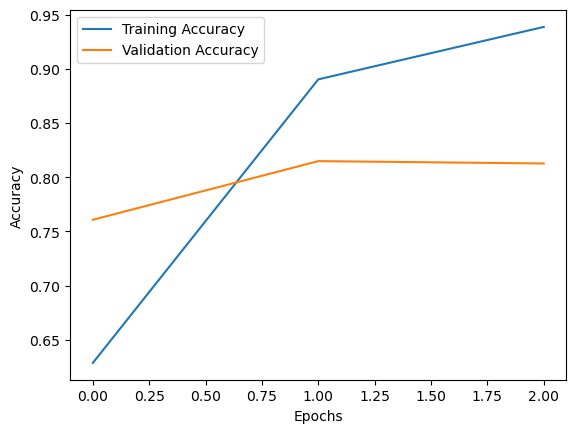

Model trained and saved. Ready to recognize sign language!


In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the dataset
def load_dataset(dataset_path):
    # Assume dataset_path contains images categorized into folders by labels
    data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

    train_data = data_gen.flow_from_directory(
        dataset_path,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical',
        subset='training'
    )

    val_data = data_gen.flow_from_directory(
        dataset_path,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical',
        subset='validation'
    )

    return train_data, val_data

# Build the CNN model
def build_model(num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Train the model
def train_model(dataset_path):
    train_data, val_data = load_dataset(dataset_path)
    num_classes = len(train_data.class_indices)

    model = build_model(num_classes)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(
        train_data,
        epochs=3,
        validation_data=val_data
    )

    return model, history

# Visualize training results
def plot_training(history):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Load a trained model and make predictions
def predict_sign(model, image):
    # Assume image is preprocessed to (64, 64, 3)
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    prediction = model.predict(image)
    return np.argmax(prediction)

# Example usage
if __name__ == "__main__":
    dataset_path = 'C:/Users/bushr/Downloads/archive (2)/asl_alphabet_train/asl_alphabet_train'
    model, history = train_model(dataset_path)
    plot_training(history)

    # Save the model
    model.save("sign_language_model.h5")

    print("Model trained and saved. Ready to recognize sign language!")


In [ ]:
import cv2
import tensorflow as tf
import numpy as np

# Load gesture recognition model
model = tf.keras.models.load_model('sign_language_model.h5')

# Alphabet example images (ensure these paths are correct)
alphabet_images = {
    'A': 'example image/A_apple.jpg',
    'B': 'example image/B_ball.jpg',
    'C': 'example image/C_cat.jpg',
    'D': 'example image/D_dog.jpg',
    'E': 'example image/E_elephant.jpg',
    'F': 'example image/F_fox.jpeg',
    'G': 'example image/G_goat.jpg',
    'H': 'example image/H_house.jpg',
    'I': 'example image/I_icecream.jpg',
    'J': 'example image/J_jug.jpg',
    'K': 'example image/K_kite.jpg',
    'L': 'example image/L_lion.jpg',
    'M': 'example image/M_monkey.jpeg',
    'N': 'example image/N_nest.jpg',
    'O': 'example image/O_owl.jpg',
    'P': 'example image/P_parrot.jpg',
    'Q': 'example image/Q_queen.jpg',
    'R': 'example image/R_rabbit.jpg',
    'S': 'example image/S_sunflower.jpg',
    'T': 'example image/T_tiger.jpeg',
    'U': 'example image/U_umbrella.jpg',
    'V': 'example image/V_vegetable.jpg',
    'W': 'example image/W_watch.jpg',
    'X': 'example image/X_xylophone.jpg',
    'Y': 'example image/Y_yak.jpg',
    'Z': 'example image/Z_zepra.jpg'
}

# Function to preprocess the frame for the model
def preprocess_for_model(frame):
    # Resize the frame to match the model input size (assuming 64x64 input)
    image_resized = cv2.resize(frame, (64, 64))
    image_resized = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image_resized = np.expand_dims(image_resized, axis=0) / 255.0  # Normalize
    return image_resized

# Open webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocess frame for gesture recognition
    preprocessed_frame = preprocess_for_model(frame)

    # Predict gesture (classify letter based on the gesture)
    prediction = model.predict(preprocessed_frame)
    predicted_class = np.argmax(prediction)  # Get the index of the highest probability
    predicted_letter = chr(predicted_class + 65)  # Convert the index to corresponding letter (A=65, B=66, etc.)

    # Fetch the example image based on the predicted letter
    example_image_path = alphabet_images.get(predicted_letter, "default_image.jpg")
    example_image = cv2.imread(example_image_path)

    # Display example image
    if example_image is not None:
        cv2.imshow("Example Image", example_image)

    # Display webcam feed with predicted letter
    cv2.putText(frame, f"Predicted: {predicted_letter}", (10, 50),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow("Webcam Feed", frame)

    # Exit on 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 705ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━

In [3]:
import cv2
import os

# Define paths
input_folder = "C:/Users/bushr/Downloads/example_images"  # Folder containing images
output_folder = "resized_images/"  # Folder to save resized images
target_size = (224, 224)  # Target dimensions (width, height)

# Create output directory if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Resize images
for filename in os.listdir(input_folder):
    if filename.endswith(('.png', '.jpg', '.jpeg')):  # Supported formats
        img_path = os.path.join(input_folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            resized_img = cv2.resize(img, target_size)
            cv2.imwrite(os.path.join(output_folder, filename), resized_img)
            print(f"Resized {filename}")


Resized A_apple.jpg
Resized B_ball.jpg
Resized C_cat.jpg
Resized D_dog.jpg
Resized E_elephant.jpg
Resized F_fox.jpeg
Resized G_goat.jpg
Resized H_house.jpg
Resized I_icecream.jpg
Resized J_jug.jpg
Resized K_kite.jpg
Resized L_lion.jpg
Resized M_monkey.jpeg
Resized N_nest.jpg
Resized O_owl.jpg
Resized P_parrot.jpg
Resized Q_queen.jpg
Resized R_rabbit.jpg
Resized S_sunflower.jpg
Resized T_tiger.jpeg
Resized U_umbrella.jpg
Resized V_vegetable.jpg
Resized W_watch.jpg
Resized X_xylophone.jpg
Resized Y_yak.jpg
Resized Z_zepra.jpg


In [39]:
# Create a function to setup the directories we'll be storing our images
def makedir(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
        return None
    else:
        pass

In [61]:
import cv2
import os

cap = cv2.VideoCapture(0)

i=0
image_count = 0
    
while i < 7:

    ret, frame = cap.read()
    frame = cv2.flip(frame, 1)

    #define region of interest
    roi = frame[100:400, 320:620]
    cv2.imshow('roi', roi)
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi, (28, 28), interpolation = cv2.INTER_AREA)

    cv2.imshow('roi sacled and gray', roi)
    copy = frame.copy()
    cv2.rectangle(copy, (320, 100), (620, 400), (255,0,0), 5)
    
    if i == 0:
        image_count = 0
        cv2.putText(copy, "Hit Enter to Record when ready", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
    if i == 1:
        image_count+=1
        cv2.putText(copy, "Recording 1st gesture - Train", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        cv2.putText(copy, str(image_count), (400 , 400), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        gesture_one = './handgestures/train/Y/'
        makedir(gesture_one)
        cv2.imwrite(gesture_one + str(image_count) + ".jpg", roi)
    if i == 2:
        image_count+=1
        cv2.putText(copy, "Recording 1st gesture - Test", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        cv2.putText(copy, str(image_count), (400 , 400), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        gesture_one = './handgestures/test/Y/'
        makedir(gesture_one)
        cv2.imwrite(gesture_one + str(image_count) + ".jpg", roi)
    if i == 3:
        cv2.putText(copy, "Hit Enter to Record when ready to Record 2nd gesture", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
    if i == 4:
        image_count+=1
        cv2.putText(copy, "Recording 2nd gesture - Train", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        cv2.putText(copy, str(image_count), (400 , 400), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        gesture_two = './handgestures/train/Z/'
        makedir(gesture_two)
        cv2.imwrite(gesture_two + str(image_count) + ".jpg", roi)
    if i == 5:
        image_count+=1
        cv2.putText(copy, "Recording 2nd gesture - Test", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        cv2.putText(copy, str(image_count), (400 , 400), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        gesture_two = './handgestures/test/Z/'
        makedir(gesture_two)
        cv2.imwrite(gesture_two + str(image_count) + ".jpg", roi)

    if i == 6:
        cv2.putText(copy, "Hit Enter to Exit", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
    cv2.imshow('frame', copy)    

    if cv2.waitKey(1) == 13: #13 is the Enter Key
        image_count = 0
        i+=1

cap.release()
cv2.destroyAllWindows() 

In [195]:
import tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import os

num_classes = 4
img_rows, img_cols = 28, 28
batch_size = 32

train_data_dir = './handgestures/train'
validation_data_dir = './handgestures/test'

# Data augmentation for training
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        color_mode='grayscale',
        class_mode='categorical') 
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        color_mode='grayscale',
        class_mode='categorical')


Found 2698 images belonging to 4 classes.
Found 2410 images belonging to 4 classes.


In [199]:
# Building the model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(img_rows, img_cols, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Output layer with `num_classes` neurons and softmax activation
model.add(Dense(num_classes))
model.add(Activation('softmax'))  # Softmax for multi-class probabilities

print(model.summary())

C:\Users\bushr\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_35 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 4)              │           516 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 420,868 (1.61 MB)

 Trainable params: 420,868 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

None


In [224]:
# Compile the model
model.compile(loss='categorical_crossentropy',  # Multi-class loss
              optimizer='rmsprop',
              metrics=['accuracy'])

# Training the model
epochs = 10
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)


Epoch 1/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 27s 169ms/step - accuracy: 0.8348 - loss: 0.4812 - val_accuracy: 0.8604 - val_loss: 0.3682
Epoch 2/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5000 - loss: 0.8346 - val_accuracy: 1.0000 - val_loss: 0.1477
Epoch 3/10


C:\Users\bushr\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


84/84 ━━━━━━━━━━━━━━━━━━━━ 14s 152ms/step - accuracy: 0.8359 - loss: 0.4773 - val_accuracy: 0.8604 - val_loss: 0.3508
Epoch 4/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - accuracy: 0.9062 - loss: 0.3247 - val_accuracy: 1.0000 - val_loss: 0.1342
Epoch 5/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 14s 152ms/step - accuracy: 0.8430 - loss: 0.4312 - val_accuracy: 0.9200 - val_loss: 0.2065
Epoch 6/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - accuracy: 0.9062 - loss: 0.3370 - val_accuracy: 0.9000 - val_loss: 0.2201
Epoch 7/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 15s 171ms/step - accuracy: 0.8234 - loss: 0.4341 - val_accuracy: 0.9463 - val_loss: 0.1911
Epoch 8/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9375 - loss: 0.2095 - val_accuracy: 1.0000 - val_loss: 0.1452
Epoch 9/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 15s 160ms/step - accuracy: 0.8333 - loss: 0.4657 - val_accuracy: 0.9588 - val_loss: 0.1584
Epoch 10/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8125 - loss: 0.3903 - val_accuracy: 0.9000 - val

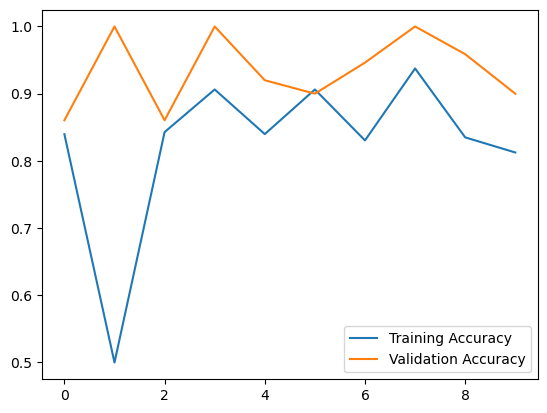

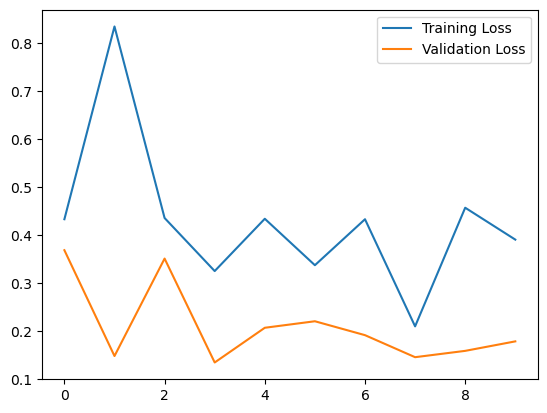

In [232]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [227]:
# Save our Model
model.save("my_gestures_cnn.h5")

In [241]:
from tensorflow.keras.models import load_model

classifier = load_model('my_gestures_cnn.h5')

In [247]:
import cv2
import numpy as np
import os

# Function to map predicted class index to alphabet
def get_alphabet(index):
    # Map index (0-25) to alphabet (A-Z)
    return chr(65 + index)  # 65 is ASCII value for 'A'

# Example images dictionary with paths to images for each letter
example_images = {
    'A': cv2.imread('example image/A_apple.jpg'),
    'B': cv2.imread('example image/B_ball.jpg'),
    'C': cv2.imread('example image/C_cat.jpg'),
    'D': cv2.imread('example image/D_dog.jpg'),
    # 'E': cv2.imread('example image/E_elephant.jpg'),
    # 'F': cv2.imread('example image/F_fox.jpeg')
}

# Initialize webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Flip the frame for mirror effect
    frame = cv2.flip(frame, 1)

    # Define the region of interest (ROI)
    roi = frame[100:400, 320:620]
    cv2.imshow('ROI', roi)

    # Convert ROI to grayscale and resize to 28x28
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
    cv2.imshow('ROI (Scaled and Gray)', roi)

    # Draw a rectangle around the ROI on the original frame
    copy = frame.copy()
    cv2.rectangle(copy, (320, 100), (620, 400), (255, 0, 0), 5)

    # Preprocess the ROI for the model
    roi = roi.reshape(1, 28, 28, 1)
    roi = roi.astype("float32") / 255.0

    # Predict the gesture
    predictions = model.predict(roi)  # Get prediction probabilities
    predicted_class = np.argmax(predictions)  # Get the index of the highest probability
    predicted_letter = get_alphabet(predicted_class)  # Convert index to alphabet

    # Display the predicted letter on the frame
    cv2.putText(copy, predicted_letter, (300, 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)

    # Overlay example image of the predicted letter
    if predicted_letter in example_images:
        example_img = example_images[predicted_letter]
        if example_img is not None:  # Ensure the image exists
            example_img_resized = cv2.resize(example_img, (100, 100))  # Resize example image to fit on the frame
            copy[20:120, 20:120] = example_img_resized  # Place example image on the top-left corner of the frame
        else:
            print(f"Example image for {predicted_letter} not found!")

    cv2.imshow('Webcam Feed', copy)

    # Exit on pressing 'Enter' key (ASCII code 13)
    if cv2.waitKey(1) == 13:
        break

# Release the webcam and close all windows
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━

In [37]:
cap.release()
cv2.destroyAllWindows() 

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


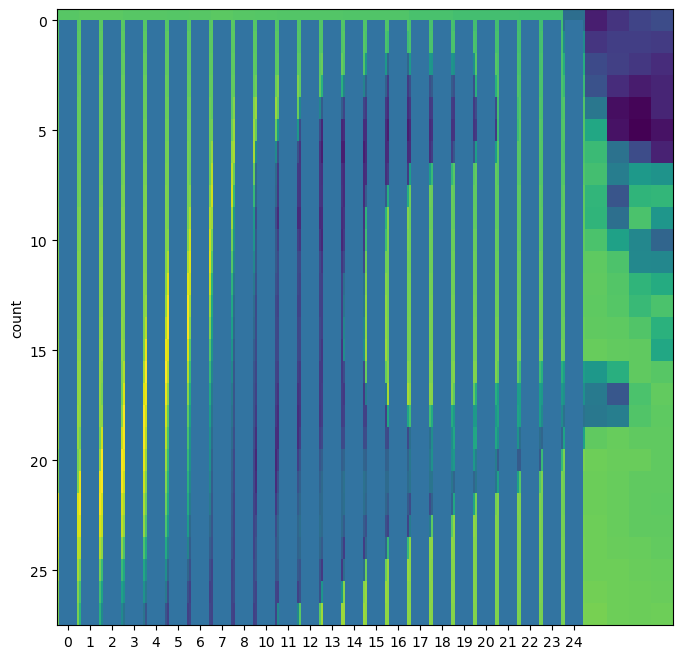

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
test= pd.read_csv(r"C:\Users\bushr\Downloads\archive (2)\sign_mnist_test.csv")
train = pd.read_csv(r"C:\Users\bushr\Downloads\archive (2)\sign_mnist_train.csv")
train.head()
labels = train['label'].values
unique_val = np.array(labels)
np.unique(unique_val)
plt.figure(figsize = (18,8))
sns.countplot(x = labels)
train.drop('label', axis = 1,inplace = True)
images = train.values
images = np.array([np.reshape(i,(28,28))for i in images])
images = np.array([i.flatten() for i in images])
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)
labels
index = 2
print(labels[index])
plt.imshow(images[index].reshape(28,28))
import cv2
import numpy as np
for i in range(0,10):
    rand = np.random.randint(0, len(images))
    input_im = images[rand]
    sample = input_im.reshape(28,28).astype(np.uint8)
    sample = cv2.resize(sample, None, fx=10, fy=10, interpolation = cv2.INTER_CUBIC)
    cv2.imshow("sample image",sample)
    cv2.waitKey(0)
cv2.destroyAllWindows()

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
batch_size = 128
num_classes = 24
epochs = 10

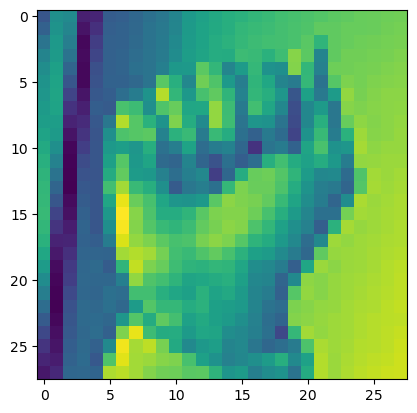

In [57]:
x_train = x_train / 255
x_test = x_test / 255
x_train  = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test  = x_test.reshape(x_test.shape[0], 28, 28, 1)
plt.imshow(x_train[0].reshape(28,28))

In [59]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras import backend as K 
from tensorflow.keras.optimizers import Adam
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28,1))) 
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense (128, activation = 'relu'))
model.add(Dropout (0.20))
model.add(Dense (num_classes, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy',
              optimizer= Adam(),
              metrics=['accuracy'])

C:\Users\bushr\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [61]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 17s 89ms/step - accuracy: 0.0996 - loss: 2.9816 - val_accuracy: 0.4267 - val_loss: 1.8795
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 13s 88ms/step - accuracy: 0.4334 - loss: 1.7268 - val_accuracy: 0.6423 - val_loss: 1.0853
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 18s 73ms/step - accuracy: 0.6509 - loss: 1.0109 - val_accuracy: 0.7942 - val_loss: 0.6523
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 13s 86ms/step - accuracy: 0.7703 - loss: 0.6720 - val_accuracy: 0.8614 - val_loss: 0.4039
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 19s 72ms/step - accuracy: 0.8520 - loss: 0.4277 - val_accuracy: 0.9274 - val_loss: 0.2542
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 22s 79ms/step - accuracy: 0.8907 - loss: 0.3192 - val_accuracy: 0.9527 - val_loss: 0.1719
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 13s 89ms/step - accuracy: 0.9216 - loss: 0.2366 - val_accuracy: 0.9687 - val_loss: 0.1253
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 22s 95ms/step - accuracy: 0.9434 - loss: 0.1768 - 

In [63]:
model.save("sign_mnist_cnn_50_Epochs.h5")
print("Model Saved")

Model Saved


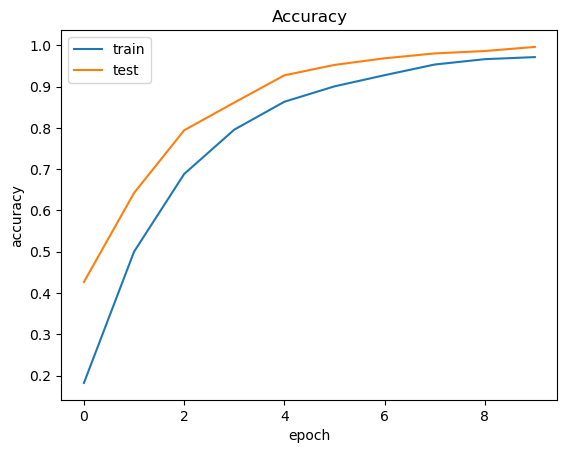

In [65]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])
plt.show()

In [67]:
test_labels = test['label']
test.drop('label', axis = 1, inplace = True)
test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])
test_labels = label_binrizer.fit_transform(test_labels)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
test_images.shape
y_pred = model.predict(test_images)

225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step


In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, y_pred.round())

0.8034021193530396

In [71]:
def getLetter(result): 
    classLabels = { 0:'A',
                    1:'B',
                    2:'C',
                    3:'D',
                    4:'E',
                    5:'F',
                    6:'G',
                    7:'H',
                    8:'I',
                    9:'K',
                    10:'L',
                    11:'M',
                    12:'N',
                    13:'0', 
                    14:'P',
                    15:'Q',
                    16:'R',
                    17:'S',
                    18:'T',
                    19:'U',
                    20:'V',
                    21:'W',
                    22:'X',
                    23:'Y'}
    try:
        res = int(result)
        return classLabels[res]
    except:
      return "Error"

In [73]:
cap = cv2.VideoCapture(0)
while True:
    
    ret, frame = cap.read()
    roi = frame[100:400, 320:620] 
    cv2.imshow('roi', roi)
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi, (28, 28), interpolation = cv2.INTER_AREA)
    cv2.imshow('roi sacled and gray', roi)
    copy = frame.copy() 
    cv2.rectangle(copy, (320, 100), (620, 400), (255,0,0), 5)
    roi = roi.reshape(1,28,28,1)
    result = str(np.argmax(model.predict(roi, 1, verbose = 0),axis=1)[0])
    cv2.putText(copy, getLetter(result), (300 , 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)
    cv2.imshow('frame', copy)
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
cap.release()
cv2.destroyAllWindows()